In [ ]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 10.067 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info 

In [ ]:
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()
import pack_cuda_lut
pack_cuda_lut._ensure_initialized()
import lap_batch
lap_batch._ensure_initialized()


Compiling CUDA LUT kernel one-time only)
Detected GPU compute capability: 89 (arch=sm_89)
Compiling: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -lineinfo -arch=sm_89 -cubin /mnt/d//packing/temp/pack_cuda_lut_saved.cu -o /mnt/d//packing/temp/pack_cuda_lut.cubin
/mnt/d//packing/temp/pack_cuda_lut_saved.cu:5: warning: "M_PI" redefined
    5 | #define M_PI 3.14159265358979323846f
      | 
In file included from /usr/include/c++/13/cmath:47,
                 from /usr/include/c++/13/math.h:36,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/math_functions.h:4577,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/common_functions.h:303,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime.h:117,
                 from <command-line>:
/usr/include/math.h:1152: note: this is the location of the previous definition
 1152 | # define M_PI     

In [ ]:
%load_ext pyinstrument

In [ ]:

import pack_ga3
import time
runner = pack_ga3.baseline()
runner.ga.do_legalize = False
runner.ga.ga_base.do_legalize = False
runner.ga.ga_base.N_trees_to_do = 47
runner.n_generations = 5
print(type(runner.rough_relaxers[0].cost.costs[2]))
#runner.rough_relaxers[0].cost.costs[2].use_lookup_table = True
runner.rough_relaxers[0].cost.costs[2]._ensure_lut_initialized()
#runner.fine_relaxers[0].cost.costs[2].use_lookup_table = True
#runner.fine_relaxers[0].cost.costs[2]._ensure_lut_initialized()


<class 'pack_cost.CollisionCostExactSeparation'>
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree116323fb.lut_cache...
Successfully loaded cached lookup table


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.367199, 0.225448]]
Generation 1: Best costs = [[0.367199, 0.093033]]
Generation 2: Best costs = [[0.367199, 0.066854]]
Generation 3: Best costs = [[0.367199, 0.051895]]
Generation 4: Best costs = [[0.367199, 0.039931]]
Elapsed time: 14.081703186035156


_     ._   __/__   _ _  _  _ _/_   Recorded: 08:59:04  Samples:  12187
 /_//_/// /_\ / //_// / //_'/ //     Duration: 14.082    CPU time: 13.354
/   _/                      v5.1.1

Cell [6]

14.081 <module>  /tmp/ipykernel_9538/617319491.py:1
`- 14.081 Orchestrator.run  pack_ga3.py:1345
   |- 6.904 Orchestrator._relax  pack_ga3.py:1301
   |  `- 6.815 run_simulation_list  pack_dynamics.py:633
   |     `- 6.789 OptimizerBFGS.run_simulation  pack_dynamics.py:42
   |        `- 6.734 lbfgs  lbfgs_torch_parallel.py:382
   |           |- 3.550 [self]  lbfgs_torch_parallel.py
   |           |- 2.388 f_torch  pack_dynamics.py:68
   |           |  |- 1.581 Device.synchronize  <built-in>
   |           |  `- 0.616 CostCompound.compute_cost  pack_cost.py:50
   |           |     `- 0.609 CostCompound._compute_cost  pack_cost.py:95
   |           |        |- 0.407 CollisionCostExactSeparation.compute_cost  pack_cost.py:50
   |           |        |  `- 0.202 CollisionCostExactSeparation._compute_cost  pack_cost.py:1000
   |           |        |     `- 0.201 CollisionCostExactSeparation._compute_cost  pack_cost.py:391
   |           |        |        `- 0.182 overlap_multi_ensemble  pack_cuda_lut.py:871
   |           |        |           `- 0.147 _set_debug_mode  pack_cuda_lut.py:709
   |           |        `- 0.202 [self]  pack_cost.py
   |           `- 0.158 Tensor.any  <built-in>
   |- 3.528 GAMultiRing.generate_offspring  pack_ga3.py:334
   |  `- 3.528 GAMultiRing._generate_offspring  pack_ga3.py:628
   |     `- 3.462 GASinglePopulationOld.generate_offspring  pack_ga3.py:334
   |        `- 3.382 GASinglePopulationOld._generate_offspring  pack_ga3.py:1139
   |           `- 3.198 MoveSelector.do_move_vec  pack_move.py:42
   |              `- 3.198 MoveSelector._do_move_vec  pack_move.py:83
   |                 |- 2.506 Crossover.do_move_vec  pack_move.py:42
   |                 |  |- 0.653 Crossover._do_move_vec  pack_move.py:307
   |                 |  |- 0.610 JiggleCluster._do_move_vec  pack_move.py:171
   |                 |  |- 0.476 CrossoverStripe._do_move_vec  pack_move.py:542
   |                 |  |- 0.278 JiggleRandomTree._do_move_vec  pack_move.py:147
   |                 |  |- 0.216 Twist._do_move_vec  pack_move.py:254
   |                 |  `- 0.142 MoveRandomTree._do_move_vec  pack_move.py:120
   |                 `- 0.491 [self]  pack_move.py
   |- 2.903 GAMultiRing.apply_selection  pack_ga3.py:379
   |  `- 2.903 GAMultiRing._apply_selection  pack_ga3.py:558
   |     `- 2.903 GASinglePopulationOld.apply_selection  pack_ga3.py:379
   |        `- 2.903 GASinglePopulationOld._apply_selection  pack_ga3.py:1025
   |           |- 2.335 compute_genetic_diversity  kaggle_support.py:1225
   |           |  `- 2.314 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |           |     `- 2.310 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |           |        |- 1.219 compute_diversity_shortcut_kernel  lap_batch.py:608
   |           |        |  |- 0.583 Device.synchronize  <built-in>
   |           |        |  `- 0.496 [self]  lap_batch.py
   |           |        |- 0.508 Device.synchronize  <built-in>
   |           |        `- 0.488 [self]  kaggle_support.py
   |           `- 0.144 array  cupy/_creation/from_data.py:7
   |              `- 0.142 array  <built-in>
   |- 0.329 GAMultiRing.initialize  pack_ga3.py:280
   |  `- 0.329 GAMultiRing._initialize  pack_ga3.py:616
   |     `- 0.321 GAMultiRing._initialize  pack_ga3.py:471
   |        `- 0.290 default_rng  cupy/random/__init__.py:20
   |- 0.229 GAMultiRing.score  pack_ga3.py:290
   |  `- 0.228 GAMultiRing._score  pack_ga3.py:484
   |     `- 0.203 GASinglePopulationOld.score  pack_ga3.py:290
   |        `- 0.203 GASinglePopulationOld._score  pack_ga3.py:759
   `- 0.154 GAMultiRing.reset  pack_ga3.py:285
      `- 0.154 GAMultiRing._reset  pack_ga3.py:481
         `- 0.154 GASinglePopulationOld.reset  pack_ga3.py:285
            `- 0.154 GASinglePopu
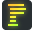

In [ ]:
%%pyinstrument
kgs.profiling=True
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [ ]:
runner.ga.best_costs_per_generation[0][-1]


array([0.36719865, 0.03993059], dtype=float32)